In [2]:
def held_karp(graph, start, end):
  n = len(graph)
  dp = [[float('inf')] * n for _ in range(1 << n)]  # table for storing shortest weights
  parent = [[-1] * n for _ in range(1 << n)]  # Table to reconstruct the path
  dp[1 << start][start] = 0 
  
  for mask in range(1 << n):
    for u in range(n):  
      if mask & (1 << u):  
        for v in range(n):  
          if not (mask & (1 << v)) and graph[u][v] != float('inf'):  
            new_weight = dp[mask][u] + graph[u][v]
            if new_weight < dp[mask | (1 << v)][v]:
              dp[mask | (1 << v)][v] = new_weight
              parent[mask | (1 << v)][v] = u
  # If start == end, we must return to the start node
  if start == end:
    min_path_weight = float('inf')
    last_node = -1
    for u in range(n):
      if dp[(1 << n) - 1][u] != float('inf') and graph[u][start] != float('inf'): 
        new_weight = dp[(1 << n) - 1][u] + graph[u][start]
        if new_weight < min_path_weight:
          min_path_weight = new_weight
          last_node = u
    # path recronstruction
    if min_path_weight != float('inf'):
      path = reconstruct_path(parent, last_node, (1 << n) - 1, start, end)
      return path, min_path_weight
  # If start != end, find the shortest path to the end node
  else:
    min_path_weight = float('inf')
    last_node = -1
    for u in range(n):
      if dp[(1 << n) - 1][u] != float('inf') and graph[u][end] != float('inf'):
        new_weight = dp[(1 << n) - 1][u] + graph[u][end]
        if new_weight < min_path_weight:
          min_path_weight = new_weight
          last_node = u
    # Path recronstruction
    if min_path_weight != float('inf'):
      path = reconstruct_path(parent, last_node, (1 << n) - 1, start, end)
      return path, min_path_weight
  
  return None, float('inf')


def reconstruct_path(parent, last_node, mask, start, end):
  """Reconstructs the path from the DP parent table."""
  path = []
  current = last_node

  while current != -1:
    path.append(current)
    next_mask = mask ^ (1 << current)
    current = parent[mask][current]
    mask = next_mask
  path.reverse()
    # Reverse to get the correct order
  if start == end:  # If it's a circuit, append the start node to form a loop
    path.append(start)

  return path


graph = [
  [0, 2, 3, 4],  # Node 0
  [2, 0, 7, 5],  # Node 1                  
  [3, 7, 0, 6],  # Node 2                     
  [4, 5, 6, 0],  # Node 3
]

# Input Start and End Node
start_node = 0  
end_node = 0

# Run Held-Karp Algorithm
shortest_path, shortest_path_weight = held_karp(graph, start_node, end_node)

# Output the result
if shortest_path and shortest_path_weight != float('inf'):
    print(f"Shortest Path (Held-Karp): {shortest_path}")
    print(f"Total Weight: {shortest_path_weight}")
else:
    print("No Valid Path Found")


Shortest Path (Held-Karp): [0, 2, 3, 1, 0]
Total Weight: 16


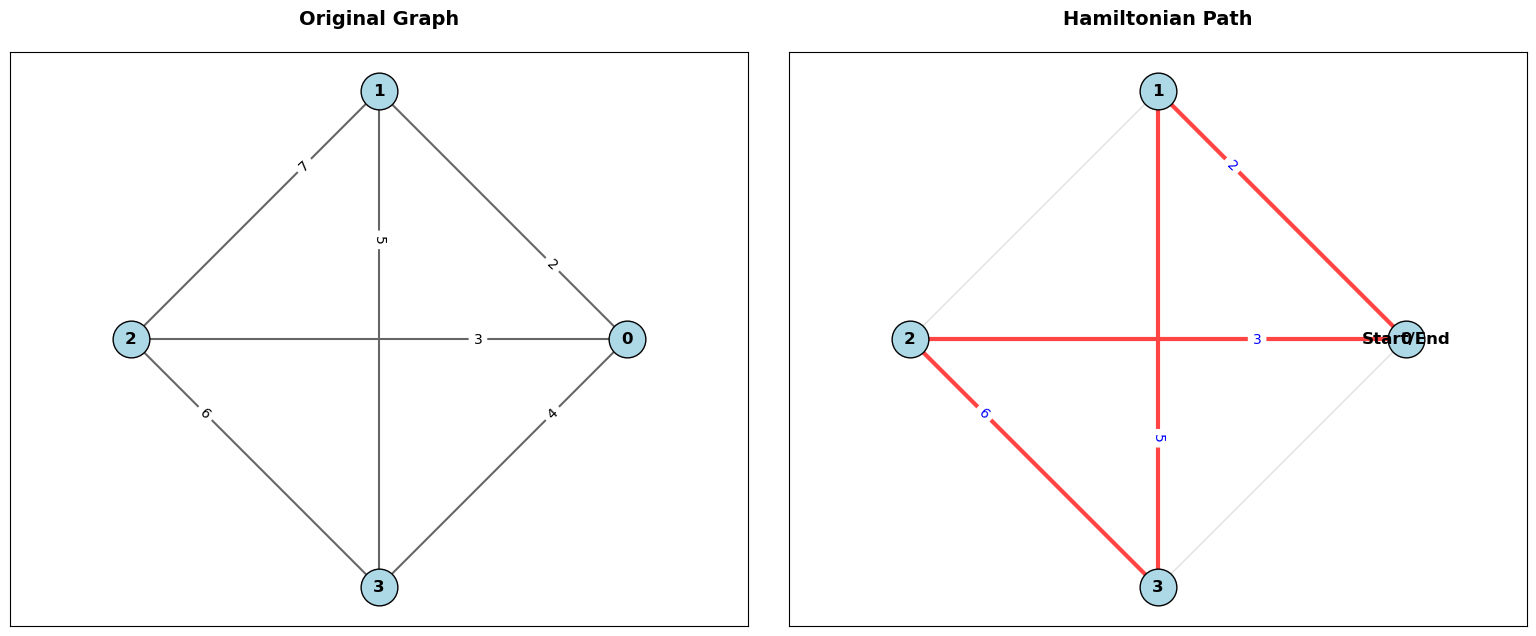

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_path(graph, path):
    G = nx.Graph()
    n = len(graph)
    for i in range(n):
        for j in range(i+1, n):
            if graph[i][j] != float('inf'):
                G.add_edge(i, j, weight=graph[i][j])

    path_edges = list(zip(path[:-1], path[1:]))
    
    # Enhanced visualization settings
    plt.figure(figsize=(16, 7))
    pos = nx.circular_layout(G)
    node_color = '#ADD8E6'  # Light blue
    edge_color = '#666666'  # Dark gray
    path_color = '#FF4444'  # Bright red
    
    # Plot original graph
    plt.subplot(121)
    nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=700, edgecolors='black')
    nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=1.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.7)
    plt.title("Original Graph", pad=20, size=14, fontweight='bold')
    plt.axis('equal')
    
    # Plot Hamiltonian path
    plt.subplot(122)
    nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=700, edgecolors='black')
    nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=1, alpha=0.2)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color=path_color, width=3)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Add edge labels with weights
    path_edge_labels = {(path[i], path[i+1]): graph[path[i]][path[i+1]] for i in range(len(path)-1)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=path_edge_labels, font_size=10, font_color='blue', label_pos=0.7)
    
    # Highlight start and end nodes with labels
    if path[0] == path[-1]:
        nx.draw_networkx_labels(G, pos, labels={path[0]: 'Start/End'}, font_size=12, font_color='black', font_weight='bold')
    else:
        nx.draw_networkx_labels(G, pos, labels={path[0]: 'Start', path[-1]: 'End'}, font_size=12, font_color='black', font_weight='bold')
    
    plt.title("Hamiltonian Path", pad=20, size=14, fontweight='bold')
    plt.axis('equal')
    
    plt.tight_layout(pad=3.0)
    plt.show()

# Add after finding shortest path
if shortest_path and shortest_path_weight != float('inf'):
    visualize_path(graph, shortest_path)